# BOOMBIKES ASSIGNMENT

## Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

 - Which variables are significant in predicting the demand for shared bikes.
 - How well those variables describe the bike demands

## Business Goal


We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 


## 1.Data Loading and understanding the Data

In [215]:
# importing basic required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# importing machine leraning libraries

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [162]:
#reading the dataset

data=pd.read_csv(r"C:\downloads\day.csv")
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


The following columns can be removed as they do not contribute meaningful information for the model:

1.instant: This column contains unique identifiers for each entry, which are irrelevant to the prediction of rental counts (cnt) 

2.dteday: Since the dataset already includes the mnth (month) and yr (year) columns,the dteday column becomes redundant and can be excluded.

3.casual and registered: The target variable, cnt, represents the total rental count and is defined as the sum of the casual and registered rentals. Thus, retaining casual and registered would mae redundancy.

In [163]:
#removing irrelevant columns

data=data.drop(['instant','dteday','casual','registered'],axis=1)


In [164]:
data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [165]:
# checkig data shape and null values

data.shape

(730, 12)

In [166]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


No null values present in data 

In [167]:
#Mapping  variables season, mnth, weathersit, weekday to  correponding string values

data['mnth']=data.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
data['yr']=data['yr'].map({0: '2018', 1: '2019'})
data['weathersit']=data.weathersit.map({1: 'Clear',2:'Mist',3:'Light',4:'Heavy'})
data['weekday']=data.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})
data['season']=data.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })

data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## 2. EDA and Data Visualiztion

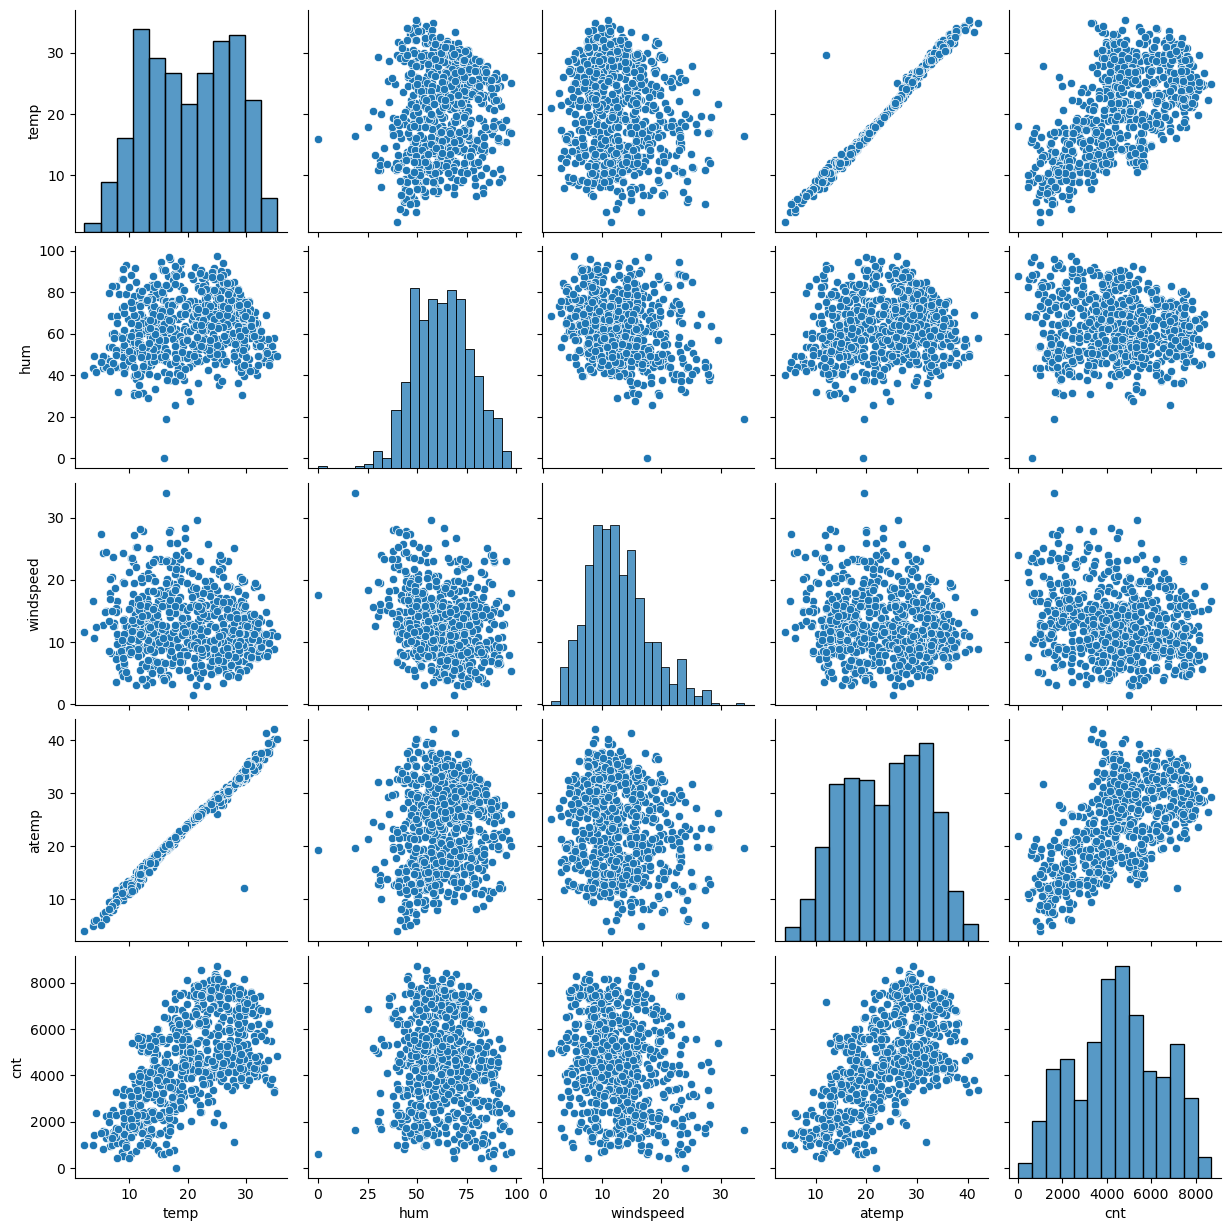

In [168]:
# creating a pairplot for numerical columns

num_cols=[ 'temp', 'hum', 'windspeed', 'atemp', 'cnt']
sns.pairplot(data[num_cols])
plt.show()



The variables 'temp' and 'apparent_temp' shows a strong collinear relationship. The decision to drop one of these variables will be made during the model-building phase to avoid multicollinearity issues.

The 'cnt' (demand for shared bikes) appears to have a clear relationship with 'temp' or 'apparent_temp', which seems to follow a mostly linear trend.

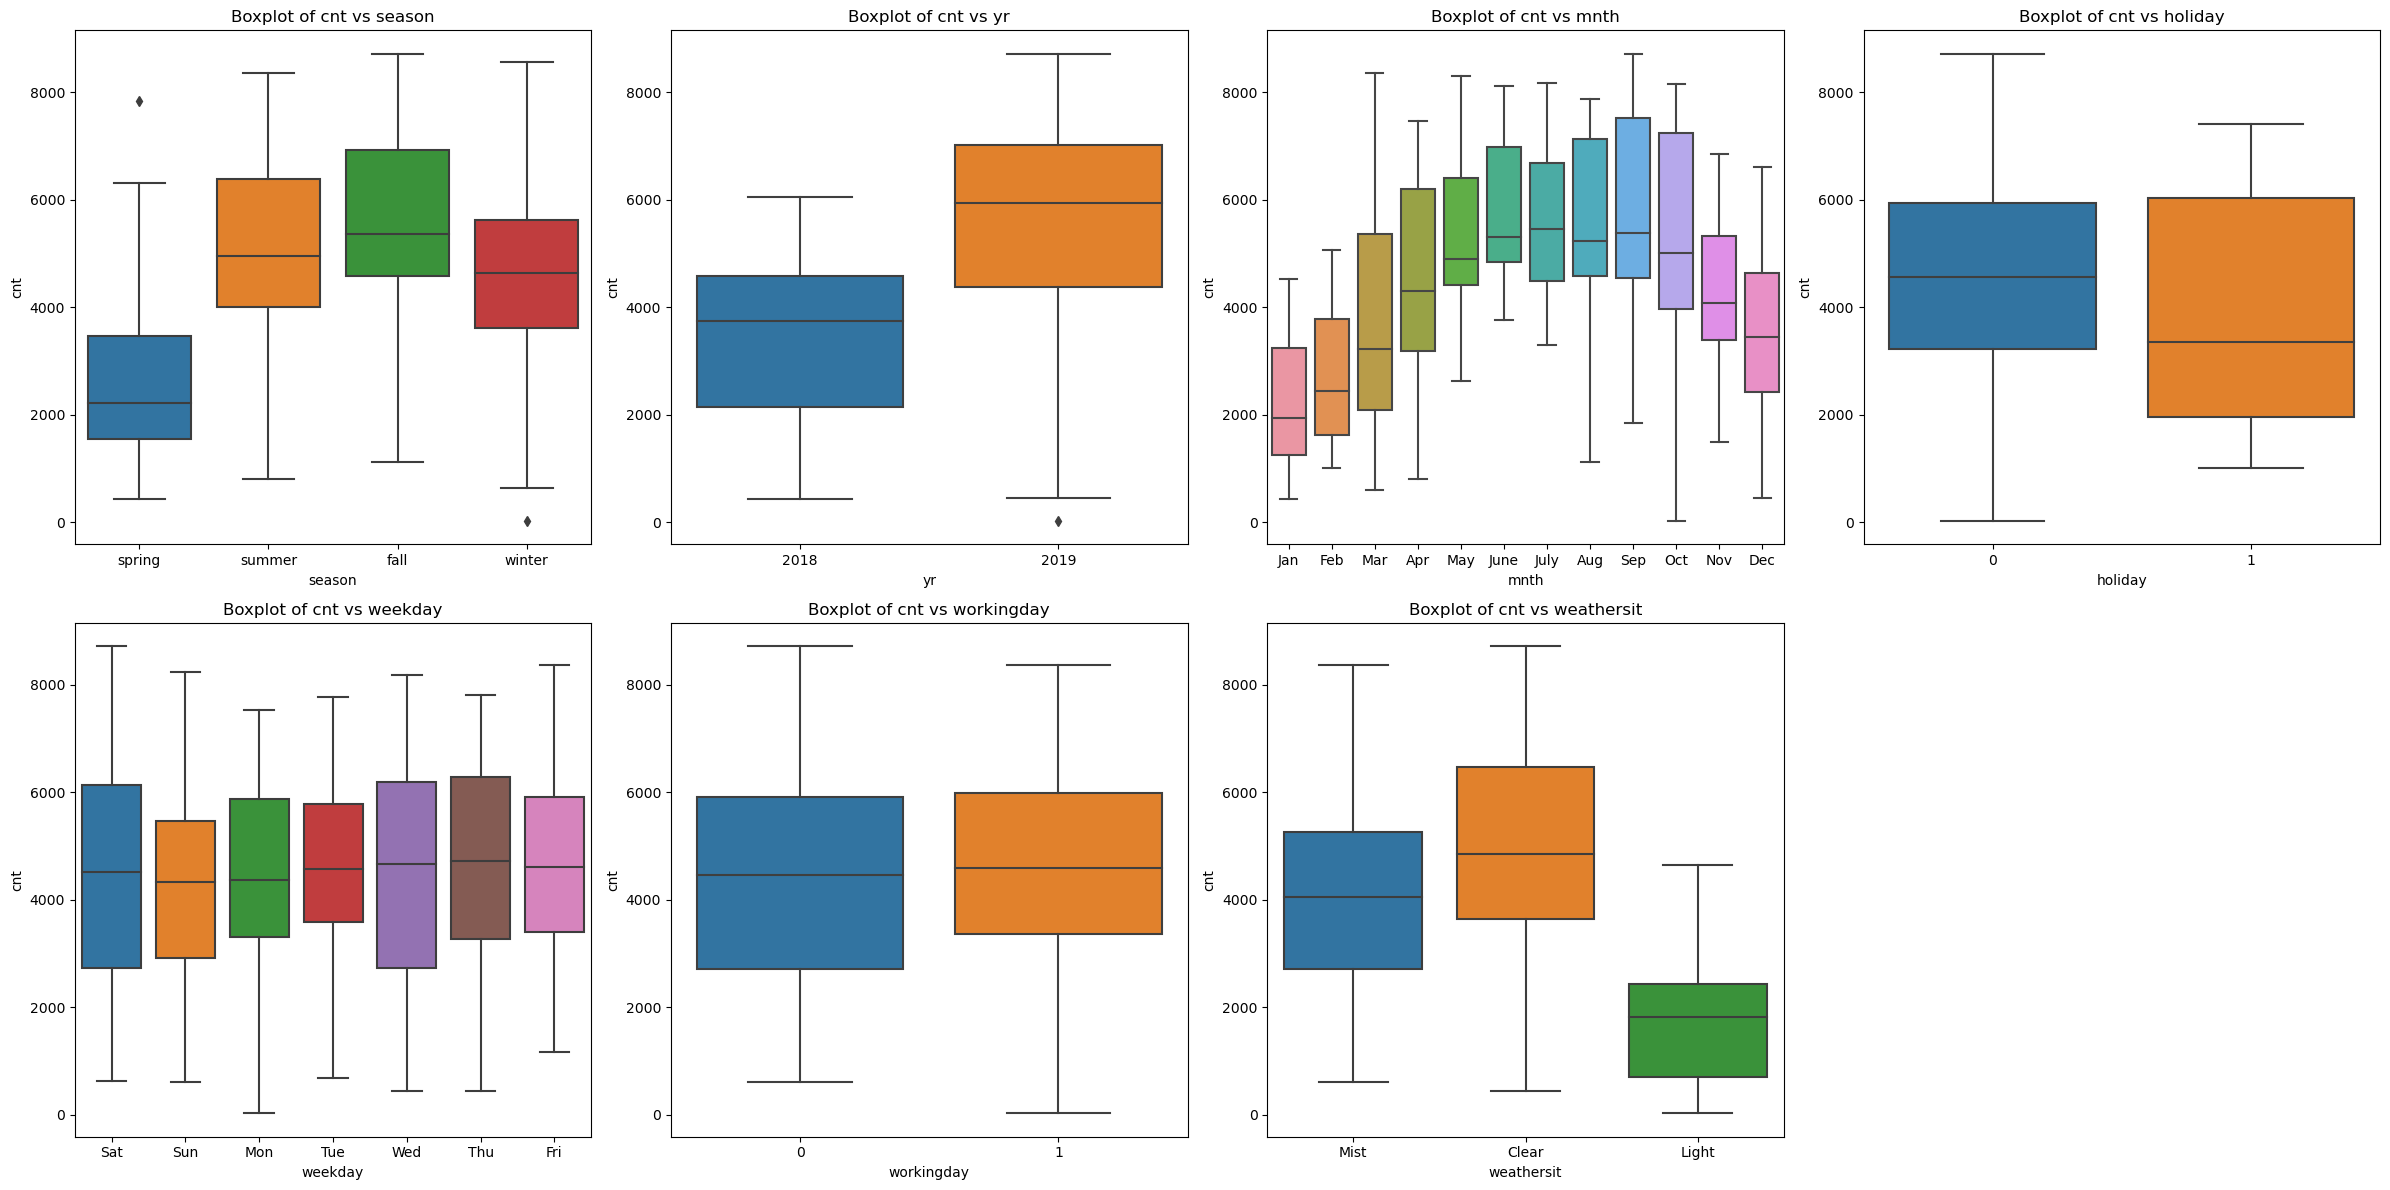

In [169]:
# define a function to create multiple boxplots

def plot_boxplots(data, cat_cols, target_col):

    num_cols = len(cat_cols)
    rows = (num_cols + 3) // 4  
    plt.figure(figsize=(24, rows * 6))

    for i, col in enumerate(cat_cols, start=1):
        plt.subplot(rows, 4, i)
        sns.boxplot(x=col, y=target_col, data=data)
        plt.title(f'Boxplot of cnt vs {col}')
    
    plt.tight_layout()
    plt.show()

cat_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

# calling teh fucntion to plot boxplots

plot_boxplots(data,cat_cols,data['cnt'])


1.Seasonal Demand: The demand for shared bikes is highest in fall, followed by summer, as these seasons offer favorable riding conditions.

2.Yearly Increase: Bike demand was higher in 2019 than in 2018.

3.Monthly Trend: Demand peaks from May to September, which aligns with the fall and summer months.

4.Holiday Effect: Bike rentals are higher on non-holidays.

5.Weekday Impact: Weekdays and working days have minimal impact on bike rental demand.

6.Weather Preference: Most rentals happen on days with clear skies or mild weather (few clouds or partly cloudy conditions).

7.Severe Weather: No bike rentals are recorded on days with heavy snow, rain, hail, or fog.

## 3. Data Preparation

### Dummy variable Creation


In [170]:
cat_vars = ['season', 'mnth', 'weekday', 'weathersit']

# Create dummy variables and drop the first category
data = pd.get_dummies(data=data, columns=cat_vars, drop_first=True)

# Convert  the dummy variables to integers

dummy_cols = [col for col in data.columns if any(cat in col for cat in cat_vars)]
data[dummy_cols] = data[dummy_cols].astype(int)

data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light,weathersit_Mist
0,2018,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,2018,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,2018,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,2018,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,2018,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [171]:
data.shape

(730, 30)

In [172]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   yr                730 non-null    object 
 1   holiday           730 non-null    int64  
 2   workingday        730 non-null    int64  
 3   temp              730 non-null    float64
 4   atemp             730 non-null    float64
 5   hum               730 non-null    float64
 6   windspeed         730 non-null    float64
 7   cnt               730 non-null    int64  
 8   season_spring     730 non-null    int32  
 9   season_summer     730 non-null    int32  
 10  season_winter     730 non-null    int32  
 11  mnth_Aug          730 non-null    int32  
 12  mnth_Dec          730 non-null    int32  
 13  mnth_Feb          730 non-null    int32  
 14  mnth_Jan          730 non-null    int32  
 15  mnth_July         730 non-null    int32  
 16  mnth_June         730 non-null    int32  
 1

In [173]:
#  convert 'yr' column to  to 0 and 1 

data['yr']=data['yr'].map({'2018': 0,'2019': 1})

In [174]:
data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light,weathersit_Mist
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


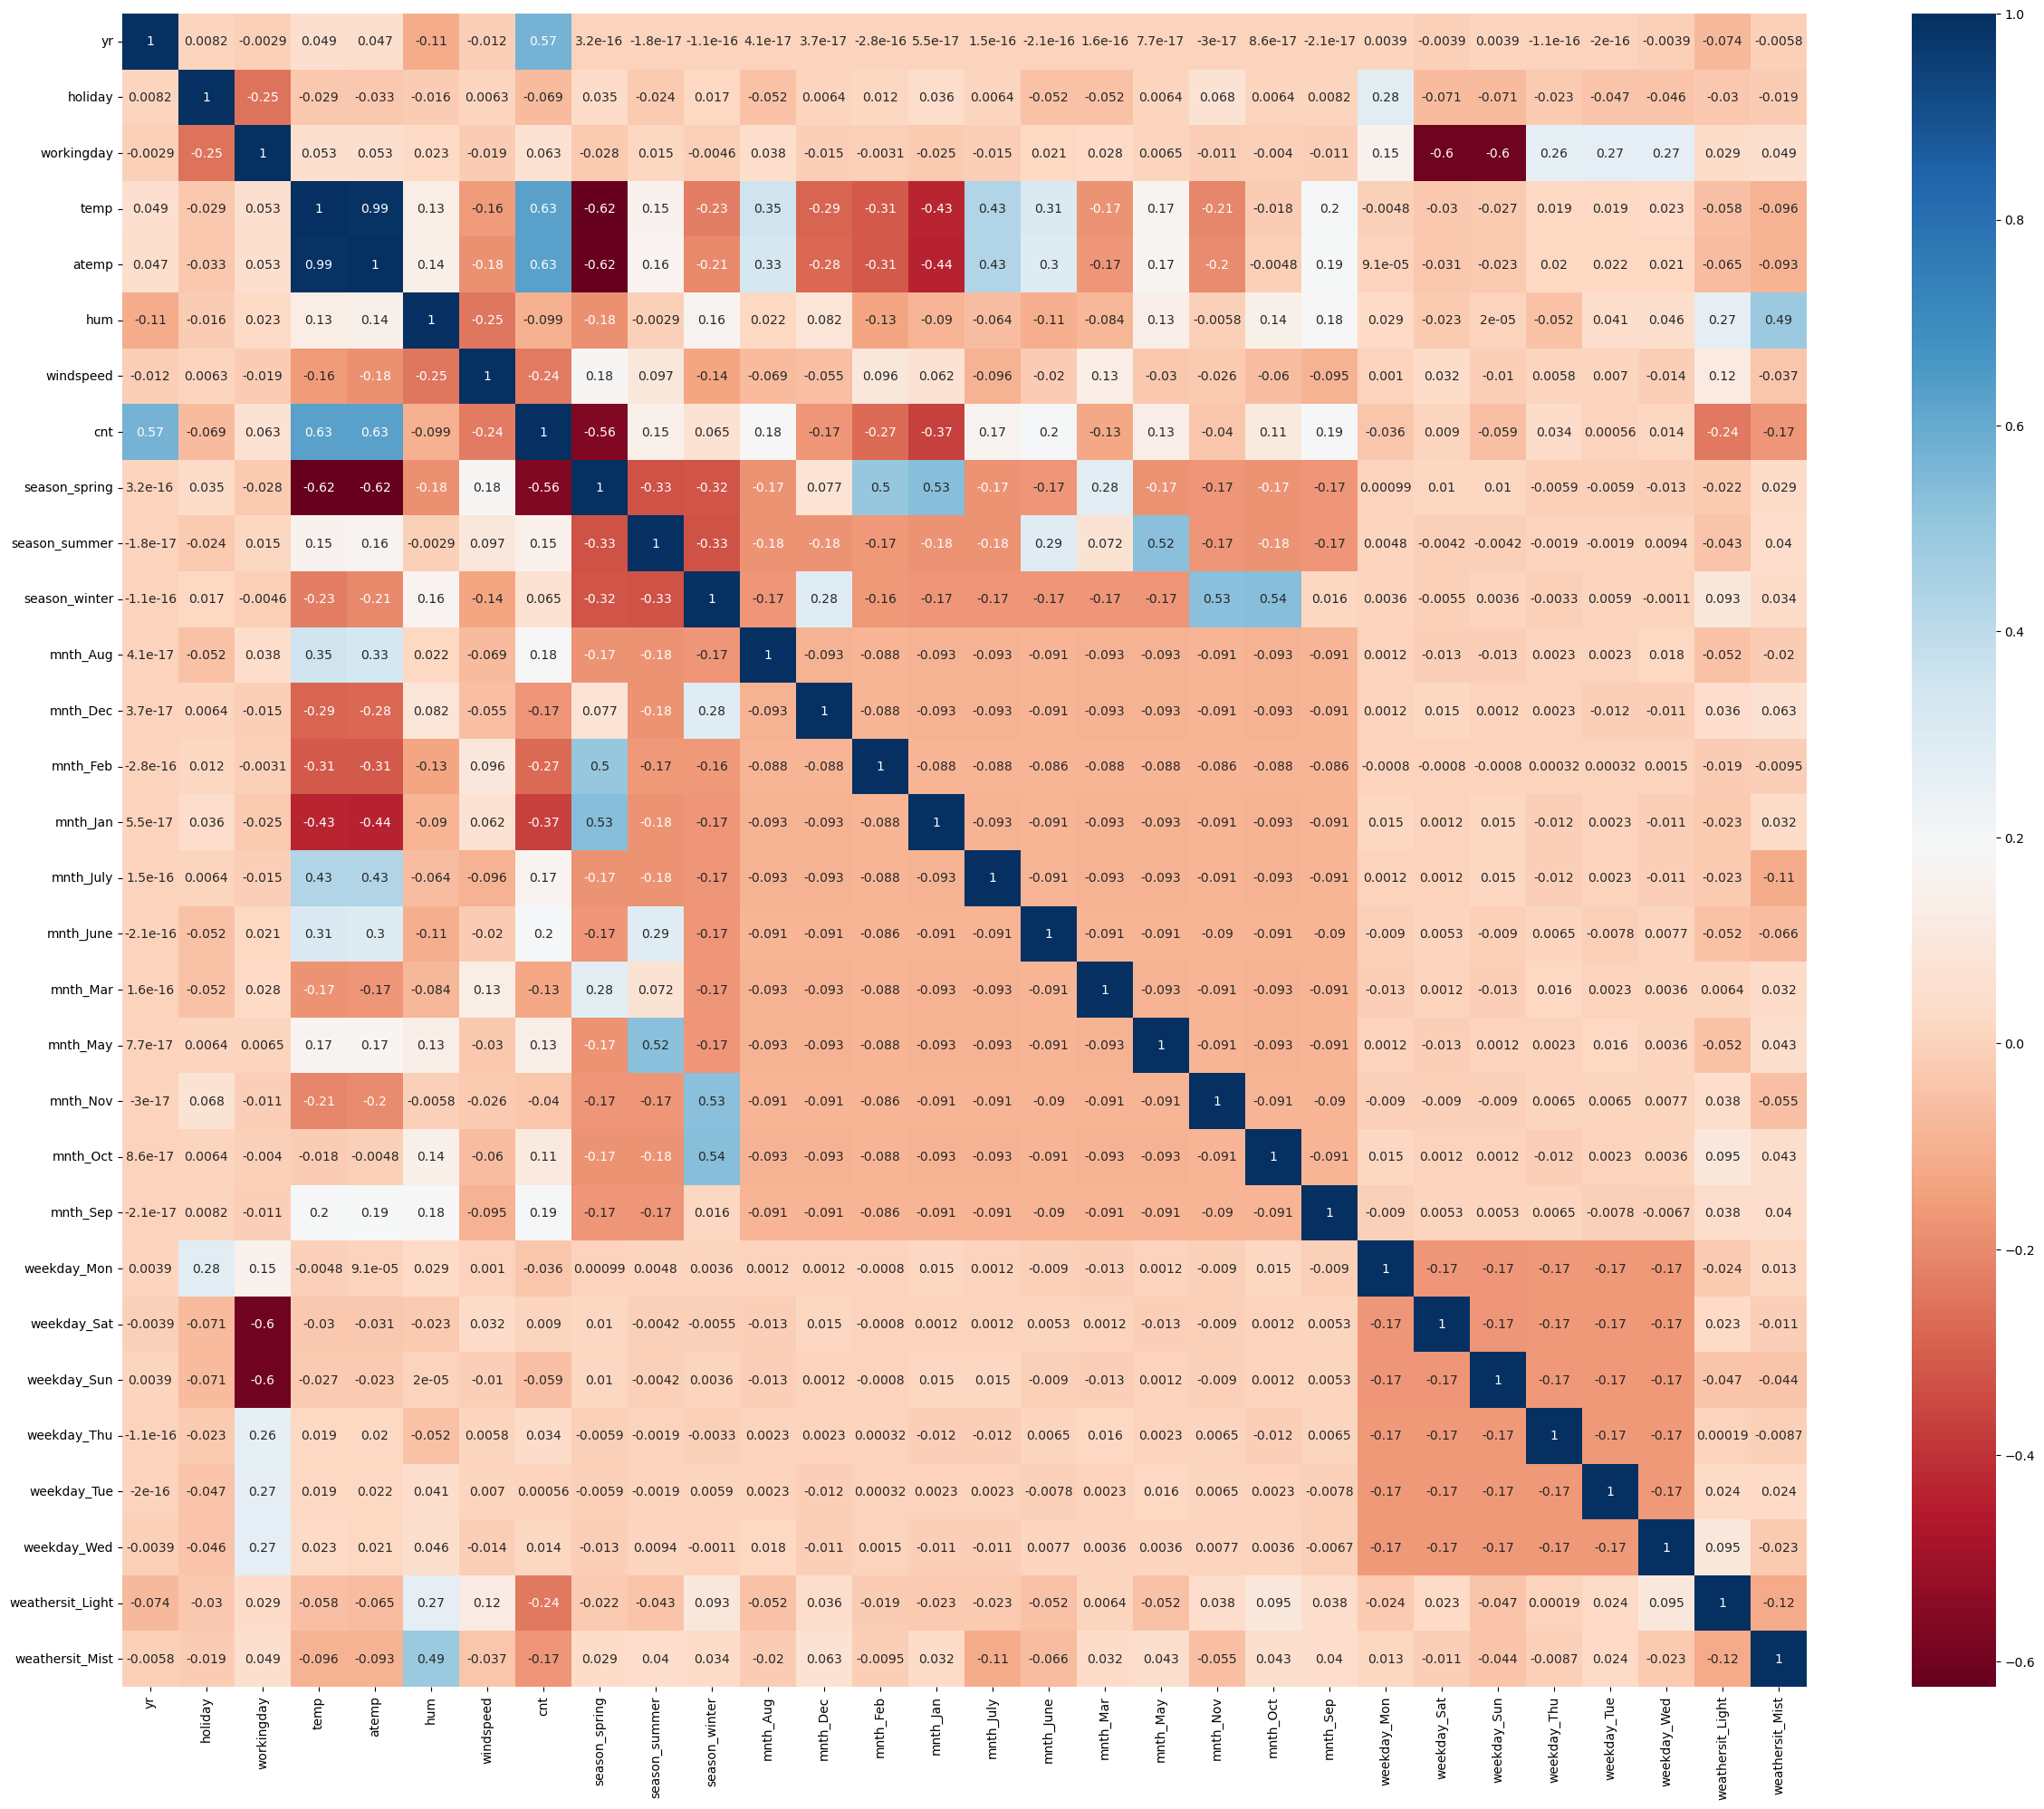

In [175]:
#Heatmap to check  correlation between the new  variables

plt.figure(figsize=(30, 24))
sns.heatmap(data.corr(), cmap='RdBu', annot = True)
plt.show()

#### The heatmap reveals that the cnt variable shows a significant correlation (greater than 0.5, both positive and negative) with seasong_spring,yr, and  temp columns . This indicates a potential linear relationship between these predictor variables and the target variable (cnt). it suitable to build linear regression model.

## 4. splitting data set to  train and test data sets

In [176]:
# splitting dataset int o tarin and test

data_train,data_test=train_test_split(data,train_size=0.7,random_state=50)

In [177]:
data_train.shape

(510, 30)

In [178]:
data_test.shape

(220, 30)

### Scaling the numeric features

In [179]:
# Applying scaler to all numeric columns 


scaler=MinMaxScaler()
num_cols=['temp', 'hum', 'windspeed', 'atemp', 'cnt']

data_train[num_cols] = scaler.fit_transform(data_train[num_cols])

data_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light,weathersit_Mist
172,0,0,1,0.865247,0.858891,0.729068,0.274549,0.515992,0,0,...,0,0,0,0,0,0,0,1,0,0
14,0,0,0,0.223565,0.236172,0.513954,0.243603,0.141049,1,0,...,0,0,0,1,0,0,0,0,0,1
204,0,0,0,0.989306,1.000000,0.567625,0.267859,0.412333,0,0,...,0,0,0,0,1,0,0,0,0,0
182,0,0,0,0.871664,0.821838,0.458136,0.150755,0.586401,0,0,...,0,0,0,1,0,0,0,0,0,0
708,1,0,1,0.483446,0.498080,0.953198,0.313605,0.592269,0,0,...,0,0,1,0,0,0,0,0,0,1


### splitting the data into X and y sets for building the model

In [180]:
y_train = data_train.pop('cnt')
X_train = data_train

In [181]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light,weathersit_Mist
172,0,0,1,0.865247,0.858891,0.729068,0.274549,0,0,0,...,0,0,0,0,0,0,0,1,0,0
14,0,0,0,0.223565,0.236172,0.513954,0.243603,1,0,0,...,0,0,0,1,0,0,0,0,0,1
204,0,0,0,0.989306,1.000000,0.567625,0.267859,0,0,0,...,0,0,0,0,1,0,0,0,0,0
182,0,0,0,0.871664,0.821838,0.458136,0.150755,0,0,0,...,0,0,0,1,0,0,0,0,0,0
708,1,0,1,0.483446,0.498080,0.953198,0.313605,0,0,1,...,0,0,1,0,0,0,0,0,0,1


In [182]:
y_train.head()

172    0.515992
14     0.141049
204    0.412333
182    0.586401
708    0.592269
Name: cnt, dtype: float64

## 5.Building the Model

RFE  (Recursive Feature Elimination using SciKitLearn )
 
We will use a mixed approach for bringing down the predictor variables. WE will begin with  RFE  tehn followed by Manual selection of features

In [183]:
# We will first fit the training data into the Linear regression model
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [184]:
# We will now run RFE on the model by selecting the top 20 features out of the 29 present 
rfe = RFE(lm,n_features_to_select=20)             
rfe = rfe.fit(X_train, y_train)

In [185]:
# check the ranking of predictor vaiables after running RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 7),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_July', True, 1),
 ('mnth_June', False, 8),
 ('mnth_Mar', False, 6),
 ('mnth_May', False, 3),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 2),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 10),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', True, 1),
 ('weekday_Thu', False, 4),
 ('weekday_Tue', False, 5),
 ('weekday_Wed', False, 9),
 ('weathersit_Light', True, 1),
 ('weathersit_Mist', True, 1)]

In [186]:
#  top 20 features variables after running RFE
predictors =  X_train.columns[rfe.support_]
predictors

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Dec',
       'mnth_Feb', 'mnth_Jan', 'mnth_July', 'mnth_Nov', 'mnth_Sep',
       'weekday_Sat', 'weekday_Sun', 'weathersit_Light', 'weathersit_Mist'],
      dtype='object')

In [187]:
# excluded features after RFE 
X_train.columns[~rfe.support_]

Index(['mnth_Aug', 'mnth_June', 'mnth_Mar', 'mnth_May', 'mnth_Oct',
       'weekday_Mon', 'weekday_Thu', 'weekday_Tue', 'weekday_Wed'],
      dtype='object')

#### One of teh observation is that both temp and atemp columns are selected  both of them are coreleated each other will drop one of them in follwing iterations

In [188]:
# Creating X_train dataframe with RFE selected predictors
X_train_rfe = X_train[predictors]

X_train_rfe

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_Nov,mnth_Sep,weekday_Sat,weekday_Sun,weathersit_Light,weathersit_Mist
172,0,0,1,0.865247,0.858891,0.729068,0.274549,0,0,0,0,0,0,0,0,0,0,0,0,0
14,0,0,0,0.223565,0.236172,0.513954,0.243603,1,0,0,0,0,1,0,0,0,1,0,0,1
204,0,0,0,0.989306,1.000000,0.567625,0.267859,0,0,0,0,0,0,1,0,0,0,1,0,0
182,0,0,0,0.871664,0.821838,0.458136,0.150755,0,0,0,0,0,0,1,0,0,1,0,0,0
708,1,0,1,0.483446,0.498080,0.953198,0.313605,0,0,1,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,0,0,1,0.581838,0.580126,0.889652,0.290701,0,1,0,0,0,0,0,0,0,0,0,0,1
289,0,0,1,0.609645,0.603073,0.597251,0.281295,0,0,1,0,0,0,0,0,0,0,0,0,0
109,0,0,1,0.687715,0.678052,0.632890,0.425316,0,1,0,0,0,0,0,0,0,0,0,0,0
480,1,0,1,0.563656,0.565153,0.779734,0.283992,0,1,0,0,0,0,0,0,0,0,0,0,1


## Model 1

In [190]:
#we will use statsmodel which can give detailed statistical inferences

#Adding constant 

X_train_m1 = sm.add_constant(X_train_rfe)

#Bulding teh first model

lr_1=sm.OLS(y_train,X_train_m1).fit()

# summary statistics of model obtained
print(lr_1.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     152.2
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          1.59e-191
Time:                        15:38:20   Log-Likelihood:                 533.78
No. Observations:                 510   AIC:                            -1028.
Df Residuals:                     490   BIC:                            -942.9
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2612      0.029  

 If we see teh p-values 'atemp' has greater one its shows its insignificance and also as we previously observed its highy correleated with 'temp' feature so we can drop it off
 
 other featuers which show high p-values are 'holiday','mnth_Feb''mnth_July',lets not drop it off  straight away , we will check VIF also to take decison whether these are insignificant or not

In [191]:
#  defien a function to calculate VIF

def VIF_calc(X_train_df):
    vif = pd.DataFrame()
    vif['features'] = X_train_df.columns
    vif['VIF'] = [variance_inflation_factor(X_train_df.values, i) for i in range(X_train_df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [192]:
# using teh function will check the VIF's

VIF_calc(X_train_rfe)

,features,VIF
2,workingday,62.61
3,temp,58.19
4,atemp,53.66
16,weekday_Sat,12.52
17,weekday_Sun,12.39
7,season_spring,6.10
9,season_winter,4.20
1,holiday,3.28
8,season_summer,2.94
12,mnth_Jan,2.08


"atemp" (VIF = 53.66, p-value = 0.643): High VIF and a non-significant p-value suggest that it might not be contributing to the model

### Model 2

In [193]:
# Dropping highly correlated variable 'atemp'
X2 = X_train_rfe.drop('atemp', axis=1)

# Adding constant
X_train_m2 = sm.add_constant(X2)

# building second fitted model
lr_2 = sm.OLS(y_train, X_train_m2).fit()

# summary statistics of model obtained
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     160.9
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          1.37e-192
Time:                        15:43:22   Log-Likelihood:                 533.67
No. Observations:                 510   AIC:                            -1029.
Df Residuals:                     491   BIC:                            -948.9
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2608      0.029  

features 'mnth_feb' ,'mnth_july','holiday' showing high p-values shows its insignificance, lets chekc teh VIF as well

In [194]:
# checking  VIF values
VIF_calc(X2)

,features,VIF
2,workingday,62.59
15,weekday_Sat,12.52
16,weekday_Sun,12.39
6,season_spring,6.05
3,temp,4.99
8,season_winter,4.12
1,holiday,3.27
7,season_summer,2.85
11,mnth_Jan,2.08
4,hum,2.02


for weekday_Sat and weekday_Sun VIFare  relatively high and are likely to be collinear with workingday 
but P-values shows it as significant but given their high VIF, they might be redundant in the model will dropp one of  them off.


### Model 3


In [195]:
# Dropping multicollinearity variable 'weekday_Sat'
X3 = X2.drop('weekday_Sat', axis=1)

# Adding constant
X_train_m3 = sm.add_constant(X3)

# Building third fitted model
lr_3 = sm.OLS(y_train, X_train_m3).fit()

# Summary statistics of model obtained
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     160.9
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          1.37e-192
Time:                        15:43:44   Log-Likelihood:                 533.67
No. Observations:                 510   AIC:                            -1029.
Df Residuals:                     491   BIC:                            -948.9
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3621      0.037  

In [196]:
#checking VIF

VIF_calc(X3)

,features,VIF
4,hum,32.30
3,temp,20.60
2,workingday,6.04
6,season_spring,5.75
5,windspeed,4.80
8,season_winter,4.36
7,season_summer,2.94
17,weathersit_Mist,2.45
11,mnth_Jan,2.09
10,mnth_Feb,1.99


holiday is now statistically significant (p-value = 0.006), whereas it was not before (after removing weekday_Sat). This suggests that holiday has a notable effect on the dependent variable when weekday_Sat is not included.

We will drop  hum, as it has an extremely high VIF (32.30), Avodidng Multicollinearity probably  with temp 

### Model 4

In [197]:
# Dropping multicollinearity variabl 'hum'
X4 = X3.drop('hum', axis=1)

# Adding constant
X_train_m4 = sm.add_constant(X4)

# Building third fitted model
lr_4 = sm.OLS(y_train, X_train_m4).fit()

# Summary statistics of model obtained
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     158.5
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          4.75e-187
Time:                        15:44:12   Log-Likelihood:                 517.68
No. Observations:                 510   AIC:                            -999.4
Df Residuals:                     492   BIC:                            -923.1
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2713      0.034  

In [198]:
# check the VIF

VIF_calc(X4)

,features,VIF
3,temp,8.20
2,workingday,5.99
4,windspeed,4.68
5,season_spring,4.55
7,season_winter,3.34
6,season_summer,2.45
0,yr,1.97
9,mnth_Feb,1.97
10,mnth_Jan,1.96
14,weekday_Sun,1.94


 removing mnth_Feb (p-value = 0.188), mnth_July (p-value = 0.167),  as they are not significant or not as impactful, except mnth_Sep which has a low p-value and could remain

### Model 5

In [199]:
# Dropping  variable' mnth_July' it does not significantly contribute to the mode
X5 = X4.drop(['mnth_Feb','mnth_July'], axis=1)

# Adding constant
X_train_m5 = sm.add_constant(X5)

# Building third fitted model
lr_5 = sm.OLS(y_train, X_train_m5).fit()

# Summary statistics of model obtained
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     178.8
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          1.68e-188
Time:                        15:44:36   Log-Likelihood:                 515.76
No. Observations:                 510   AIC:                            -999.5
Df Residuals:                     494   BIC:                            -931.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2566      0.033  

In [200]:
##checking the VIF

VIF_calc(X5)

,features,VIF
3,temp,6.54
2,workingday,5.97
4,windspeed,4.67
7,season_winter,3.10
5,season_spring,3.08
6,season_summer,2.10
0,yr,1.96
12,weekday_Sun,1.94
10,mnth_Nov,1.84
14,weathersit_Mist,1.59


 workingday is no longer significant and its VIF is relatively high and high p-value , removing it should reduce complexity of model without impactingthe performance.

### Model 6

In [203]:
# Dropping  variable 'workingday'
X6 = X5.drop('workingday', axis=1)

# Adding constant
X_train_m6 = sm.add_constant(X6)

# Building third fitted model
lr_6 = sm.OLS(y_train, X_train_m6).fit()

# Summary statistics of model obtained
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.2
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          2.85e-189
Time:                        15:47:37   Log-Likelihood:                 514.86
No. Observations:                 510   AIC:                            -999.7
Df Residuals:                     495   BIC:                            -936.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2457      0.032  

In [204]:
# chekcing VIF

VIF_calc(X6)

,features,VIF
3,windspeed,4.67
2,temp,4.01
6,season_winter,2.84
4,season_spring,2.61
0,yr,1.96
5,season_summer,1.96
9,mnth_Nov,1.82
13,weathersit_Mist,1.59
7,mnth_Dec,1.50
8,mnth_Jan,1.48


Observations:

Statistical Significance:

1.All variables selected in the model have P-values < 0.05, indicating that they are statistically significant predictors of the target variable. This means each variable contributes to explaining the variability in the target.

2.The Variance Inflation Factor (VIF) values are all within acceptable limits (most are < 5), suggesting there is no multicollinearity issue in the model. This ensures the stability and reliability of the regression coefficients.

3.windspeed (4.67) and temp (4.01) have slightly higher VIFs but are well within acceptable limits.
All other variables (e.g., yr, mnth_Nov, holiday) have low VIF values, indicating independent contributions.

4.Prob(F-statistic) being ~0.0000 confirms that the overall model is significant.

5.R-squared and adjusted R-squared are 84% which means 84% of the variance of 'count' is explained by the model


There is no point in conducting further iterations, as they are unlikely to significantly improve the model's performance or enhance its fit in a meaningful way.


## Step 6 Residual Analysis

#### One major assumption in Linear regression is that the residual errors are normally distributed around 0. Therefore, we will be analyzing the same by plotting the residuals as a histogram

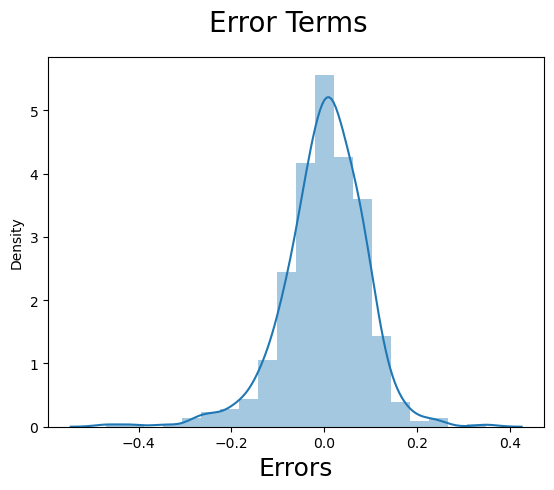

In [206]:
# y predicted
y_train_pred = lr_6.predict(X_train_m6)

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)                         #
plt.show()

### The error terms are normally distributed, with a mean of zero

### Test for Homoscedasticity

An assumption of linear regression is homoscedasticity. Homoscedasticity in a model means that the error is constant along the values of the dependent variable.

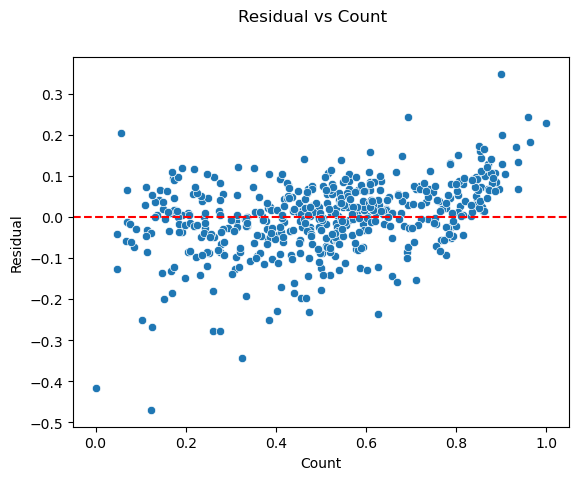

In [210]:
# Residual calculation 
residual = y_train - y_train_pred

# Plotting residuals vs actuals
sns.scatterplot(x=y_train, y=residual)

# Adding a horizontal line at 0 
plt.axhline(0, color='red', linestyle='--')


plt.xlabel('Count')
plt.ylabel('Residual')
plt.suptitle('Residual vs Count')

# Show plot
plt.show()

####  Since there is no visible pattern in the residuals plot, it indicates that homoscedasticity is well preserved, meaning the variance of the residuals remains constant across all levels of the predicted values.

## STEP 7: Making Predictions Using the Final Model

In [211]:
#Applying the scaling on the test sets

data_test[num_cols] = scaler.transform(data_test[num_cols])

data_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light,weathersit_Mist
333,0,0,1,0.341207,0.324343,0.632030,0.488582,0.413139,0,0,...,0,0,0,0,0,0,0,1,0,0
203,0,0,0,1.013904,1.013214,0.515242,0.185727,0.375403,0,0,...,0,0,0,1,0,0,0,0,0,0
279,0,0,1,0.579699,0.594242,0.705024,-0.049804,0.570985,0,0,...,1,0,0,0,0,0,0,0,0,0
483,1,0,0,0.512322,0.518402,0.604980,0.154750,0.722734,0,1,...,0,0,0,0,1,0,0,0,0,0
267,0,0,0,0.737981,0.689572,0.870760,0.010767,0.573861,0,0,...,0,1,0,0,1,0,0,0,0,1


In [214]:
# Dividing into X_test and y_test dataframes
y_test = data_test.pop('cnt')
X_test = data_test

# Adding constant variable to test dataframe
X_test_m6 = sm.add_constant(X_test)

# Dropping variables from X_test_m6
X_test_m6 = X_test_m6[X_train_m6.columns]

# Making predictions using the sixt  model.i.e fianl model
y_pred_m6 = lr_6.predict(X_test_m6)

## STEP 8: Model Evaluation

### Lets check R-squared and Adjusted R-squared for Test Data

In [216]:
# R-square for test

r2 = r2_score(y_test,y_pred_m6)
print(f"Rsquare = {r2}")

# n is number of rows in test dataset
n = X_test_m6.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test_m6.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = round(1-(1-r2)*(n-1)/(n-p-1),4)
print(f"adjusted_r2 = {adjusted_r2}")

Rsquare = 0.8135528027305575
adjusted_r2 = 0.7998



Since the difference between r square and Adjusted Rsquare on the test data is minimal, it indicates that the model performs well without significant overfitting or underfitting.

### Creating a regression plot between Predicted and Actual values of Y on test data

Text(0, 0.5, 'Actual Count')

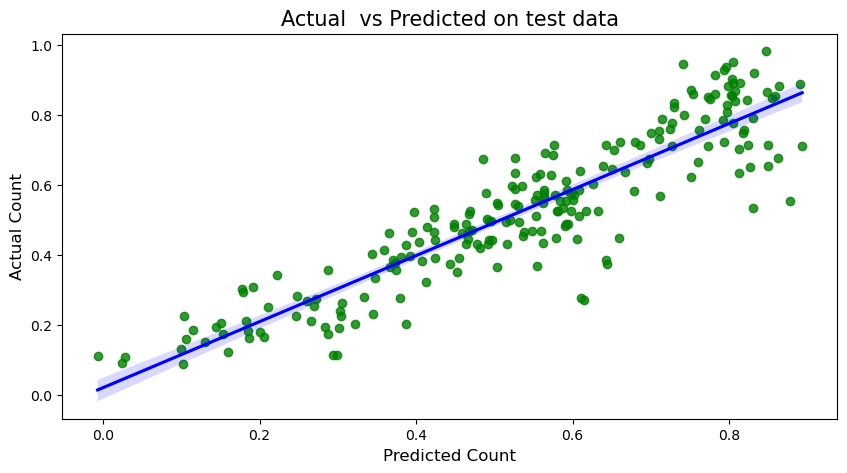

In [218]:


plt.figure(figsize=(10,5))

sns.regplot(x=y_pred_m6, y=y_test, scatter_kws={"color": "green"},fit_reg=True, line_kws={"color": "blue"})

plt.title('Actual  vs Predicted on test data', fontsize=15)
plt.xlabel('Predicted Count', fontsize=12)
plt.ylabel('Actual Count', fontsize=12)

### The actual v/s predicted values are quite close


### Count=0.2457+0.2373⋅yr−0.0638⋅holiday+0.4201⋅temp−0.1495⋅windspeed−0.0767⋅season_spring+0.0425⋅season_summer+0.1046⋅season_winter−0.0539⋅mnth_Dec−0.0474⋅mnth_Jan−0.0620⋅mnth_Nov+0.0575⋅mnth_Sep−0.0380⋅weekday_Sun−0.2742⋅weathersit_Light−0.0797⋅weathersit_Mist

### Final Metrics

Training R-squared: 0.844
The R-squared value for the training data indicates that 84.4% of the variance in the target variable is explained by the model on the training data.

Training Adjusted R-squared: 0.840
The adjusted R-squared for the training data indicates that 84.0% of the variance in the target variable is explained by the model, adjusted for the number of predictors.

Test R-squared: 0.813
The R-squared value for the test data indicates that 81.3% of the variance in the target variable is explained by the model on the test data.

Test Adjusted R-squared: 0.799
The adjusted R-squared for the test data indicates that 79.9% of the variance in the target variable is explained by the model on the test data.

Percentage Difference in R-squared: 3.68%
The R-squared value for the training dataset is slightly higher than for the test dataset. A 3.68% difference suggests minimal overfitting.

Percentage Difference in Adjusted R-squared: 4.88%
The adjusted R-squared shows a 4.88% difference between training and test datasets, indicating that the model's generalization performance is still good without significant overfitting.

### Interpreatiosn and Recommendations

Top 3 Significant Features Contributing to Shared Bike Demand:


### 1.Temperature (temp) with a coefficient of 04201:

Interpretation: The positive coefficient for temperature indicates a strong, positive relationship with bike demand. As the temperature increases, the demand for shared bikes increases. This suggests that warmer weather encourages more people to rent bikes, likely because people are more willing to bike when the weather is favorable.

Suggestion: The business should consider increasing marketing and promotions during warmer months when demand is likely to peak. 

### 2.Weather Situation:Light Snow/Rain(weathersit_Light) with a coefficient of -0.2742:

Interpretation: The negative coefficient for light snow, rain, or misty weather (represented by weathersit = 3) shows that adverse weather conditions reduce bike demand. People are less likely to rent bikes during rainy, snowy, or misty weather due to discomfort or potential safety concerns.

Suggestion: During periods of light snow, rain, or mist, the business could offer targeted promotions or introduce flexible rental policies, such as longer rental times for the same price, to encourage users to rent bikes despite the weather.


### 3.Year (yr) with a coefficient of 0.2373:

Interpretation: The positive coefficient for the year variable indicates that bike demand has increased significantly in 2019 compared to 2018. 

Suggestion: The business should continue to capitalize on this upward trend by increasing brand awareness campaigns
